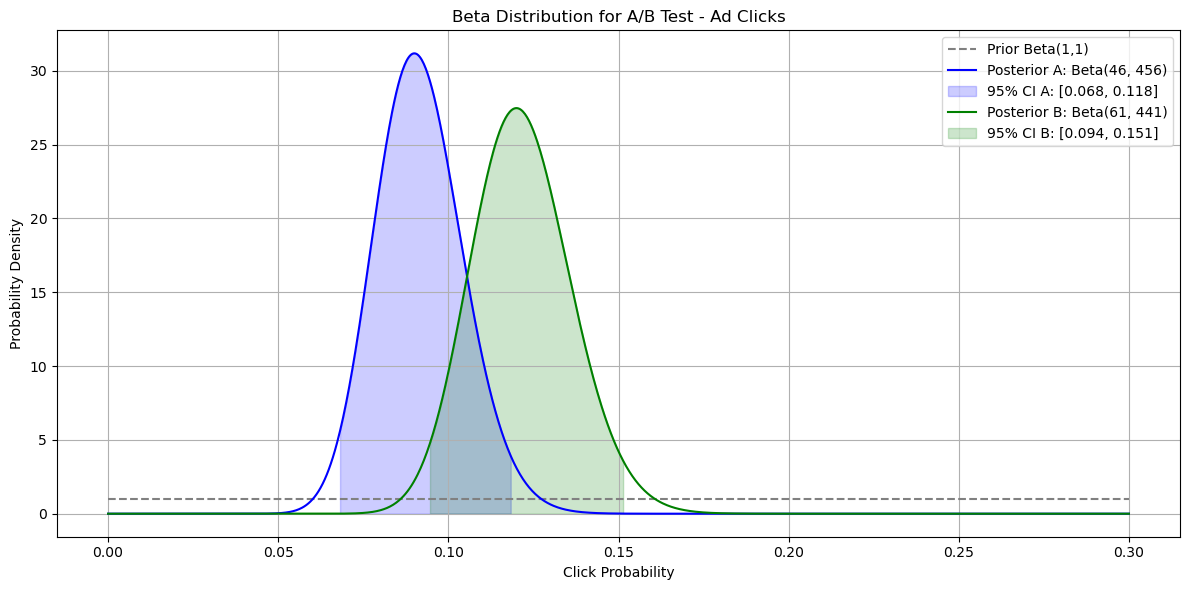

According to the Monte Carlo simulation probability that sample B is greather than A is equal to:  0.93834


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Example of an A/B test - ad clicks
# Group A: image ad
# Group B: video ad

# Data from A/B test
clicks_A = 45
impressions_A = 500

clicks_B = 60
impressions_B = 500

# Prior - we assume a lack of initial knowledge (a uniform Beta(1,1) distribution)
prior_alpha = 1
prior_beta = 1

# Posterior - we add clicks and non-clicks to the prior
post_alpha_A = prior_alpha + clicks_A
post_beta_A = prior_beta + (impressions_A - clicks_A)

post_alpha_B = prior_alpha + clicks_B
post_beta_B = prior_beta + (impressions_B - clicks_B)

# 95% confidence intervals
ci_A = beta.interval(0.95, post_alpha_A, post_beta_A)
ci_B = beta.interval(0.95, post_alpha_B, post_beta_B)

# Generating the plot
x = np.linspace(0, 0.3, 1000)

# Calculating the probability density functions (PDFs)
prior_y = beta.pdf(x, prior_alpha, prior_beta)
posterior_y_A = beta.pdf(x, post_alpha_A, post_beta_A)
posterior_y_B = beta.pdf(x, post_alpha_B, post_beta_B)

# Creating the plot
plt.figure(figsize=(12, 6))

# Prior distribution
plt.plot(x, prior_y, linestyle='--', color='gray', label='Prior Beta(1,1)')

# Posterior distributions and confidence intervals
plt.plot(x, posterior_y_A, label=f'Posterior A: Beta({post_alpha_A}, {post_beta_A})', color='blue')
plt.fill_between(x, 0, posterior_y_A, where=(x >= ci_A[0]) & (x <= ci_A[1]), color='blue', alpha=0.2,
                 label=f'95% CI A: [{ci_A[0]:.3f}, {ci_A[1]:.3f}]')

plt.plot(x, posterior_y_B, label=f'Posterior B: Beta({post_alpha_B}, {post_beta_B})', color='green')
plt.fill_between(x, 0, posterior_y_B, where=(x >= ci_B[0]) & (x <= ci_B[1]), color='green', alpha=0.2,
                 label=f'95% CI B: [{ci_B[0]:.3f}, {ci_B[1]:.3f}]')

plt.title('Beta Distribution for A/B Test - Ad Clicks')
plt.xlabel('Click Probability')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Monte Carlo simulation - calculating the probability that B > A
# We sample many times from the posterior distributions for A and B

n_samples = 100_000
samples_A = beta.rvs(post_alpha_A, post_beta_A, size=n_samples)
samples_B = beta.rvs(post_alpha_B, post_beta_B, size=n_samples)

# Calculate how many times B > A
prob_B_greater_A = np.mean(samples_B > samples_A)

print(f"According to the Monte Carlo simulation probability that sample B is greather than A is equal to:  {prob_B_greater_A}")